In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
### Load the training array, labels and features
train_array = np.load('train_array.npy')
train_labels = np.load('train_labels.npy')
train_features = np.load('train_features.npy')

In [3]:
### Load the validation array, labels and features
valid_array = np.load('valid_array.npy')
valid_labels = np.load('valid_labels.npy')
valid_features = np.load('valid_features.npy')

In [4]:
### Load the test array, labels and features
test_array = np.load('test_array.npy')
test_labels = np.load('test_labels.npy')
test_features = np.load('test_features.npy')

In [5]:
### Create inputs and outputs for training ang validation
X_train = train_features
X_valid = valid_features
X_test = test_features
y_train = train_labels
y_valid = valid_labels
y_test = test_labels

# Logistic regression
Train and evaluate a logistic regression model (without any regularization `penalty="none"` and without any hyperparameters tuning).

In [6]:
### Create a logistic regression model and fit it
lr_model = LogisticRegression(penalty=None)
lr_model.fit(X_train, y_train)
### Compute the accuracy
accuracy = lr_model.score(X_valid, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.92


# Visualize the coefficients
Get the model coefficients using the coef_ attribute of your estimator and visualize them using a heatmap.
- What are the largest 5 coefficients for each category (i.e. the indices of these coefficients)?
- Are these results consistent with your observations during the data exploration in the last question of Task 1?

In [7]:
### Print the shape of the coefficients
lr_model.coef_.shape

(6, 1280)

In [8]:
### Create a dataframe with the coefficients
df_coeff = pd.DataFrame(lr_model.coef_)
df_coeff

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0.036453,-0.002972,-0.001350,-0.031373,0.125126,-0.077177,-0.032230,-0.064796,0.013597,-0.007821,...,-0.071634,0.088183,0.050917,-0.093786,-0.026184,-0.006343,0.013371,-0.009996,-0.082181,0.209521
1,0.258501,0.047177,-0.082990,-0.050379,-0.131730,0.113081,-0.010822,-0.189034,-0.021972,0.002516,...,-0.126083,-0.042333,-0.016378,0.023298,-0.028540,0.106300,-0.075731,0.051317,0.162173,-0.006122
2,0.014707,-0.006000,0.014929,0.046977,-0.089695,-0.075338,0.033703,-0.087493,-0.063752,0.005345,...,0.005166,-0.016515,-0.012229,-0.123153,0.000622,-0.022945,0.054274,-0.029131,-0.136006,-0.043474
3,0.031294,0.232402,0.098282,0.041313,0.185006,0.035816,0.023824,0.117958,0.038058,-0.006191,...,0.169149,-0.089787,-0.009851,0.193871,-0.039289,0.010193,0.185415,-0.104800,-0.172934,-0.114999
4,-0.157233,-0.043822,0.025648,0.040798,-0.171628,-0.108400,-0.007318,0.127653,0.087450,0.008750,...,0.029048,0.119373,-0.005782,0.097609,0.142765,-0.013545,-0.099410,0.147405,0.395777,0.084874
5,-0.183721,-0.226785,-0.054520,-0.047336,0.082920,0.112018,-0.007157,0.095712,-0.053381,-0.002600,...,-0.005646,-0.058921,-0.006677,-0.097839,-0.049374,-0.073660,-0.077919,-0.054795,-0.166829,-0.129800


<Axes: >

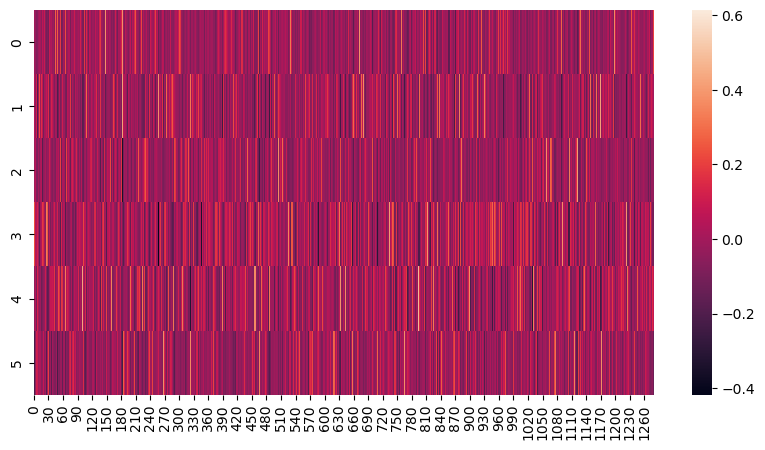

In [9]:
plt.figure(figsize=(10,5))
sns.heatmap(df_coeff)

In [10]:
for i in range(6):
    print(f'Top 5 coefficients for the category {i}')
    print(df_coeff.loc[i].sort_values(ascending=False)[:5])

Top 5 coefficients for the category 0
801     0.457432
54      0.401776
1094    0.389775
999     0.384856
672     0.384647
Name: 0, dtype: float64
Top 5 coefficients for the category 1
291     0.614731
861     0.426456
1170    0.416903
871     0.416242
183     0.413213
Name: 1, dtype: float64
Top 5 coefficients for the category 2
1122    0.408200
1043    0.374768
1058    0.371092
505     0.364561
898     0.338976
Name: 2, dtype: float64
Top 5 coefficients for the category 3
411     0.458748
493     0.410522
1231    0.406263
734     0.401864
812     0.388585
Name: 3, dtype: float64
Top 5 coefficients for the category 4
580    0.593002
378    0.533293
555    0.524052
794    0.477187
335    0.451797
Name: 4, dtype: float64
Top 5 coefficients for the category 5
138     0.472082
1022    0.428553
765     0.377435
267     0.375533
1172    0.372690
Name: 5, dtype: float64


The results are not fully consistent with the Task 1 because there are features that are missing

# $L_2$ regularization 
Set an “l2” regularization and tune the regularization strength parameter of the model with cross-validated grid-search.

In [11]:
lr_model_tune = LogisticRegression()

params = {
    'penalty': ['l2'],
    'C': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8, 1e9],
    'solver': ['lbfgs'],
    'multi_class': ['ovr']
}

grid_model = GridSearchCV(estimator=lr_model_tune, param_grid=params, cv=5, scoring='accuracy', return_train_score=True)
grid_model.fit(X_train, y_train)
print('Accuracy: {:.2f}'.format(grid_model.best_score_))
print('Best parameters {}'.format(grid_model.best_params_))

Accuracy: 0.90
Best parameters {'C': 100000.0, 'multi_class': 'ovr', 'penalty': 'l2', 'solver': 'lbfgs'}


In [12]:
best_lr_model = grid_model.best_estimator_
best_lr_model.fit(X_train, y_train)
accuracy = best_lr_model.score(X_valid, y_valid)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.90


In [13]:
print('Test accuracy: {:.2f}'.format(best_lr_model.score(X_test, y_test)))

Test accuracy: 0.92


# Results of grid search
Report the result of cross-validated grid-search as a dataframe and interpret the result. In particular, briefly explain what are the `mean_train_score`, `mean_test_score`, `std_train_score` and `std_test_score`:
- How are they obtained?
- What do they measure?

Grid search splits the train set into five parts, four are used as training sets and 1 as validation set.  
For each parameter values, grid search runs five times, changing everytime the sets and, before apply the new parameter, computes the mean and the standard deviation.

In [14]:
### Create a dictionary with the grid search results
score_columns = ['mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']
mydict = {x: grid_model.cv_results_[x] for x in score_columns}
mydict['C'] = grid_model.param_grid['C']
df = pd.DataFrame(mydict)

In [15]:
df.head()

,mean_train_score,std_train_score,mean_test_score,std_test_score,C
0,0.431250,0.017313,0.421429,0.029014,0.00001
1,0.556250,0.013716,0.539286,0.020825,0.00010
2,0.842857,0.004374,0.796429,0.021429,0.00100
3,0.986607,0.003993,0.885714,0.026726,0.01000
4,1.000000,0.000000,0.896429,0.026245,0.10000


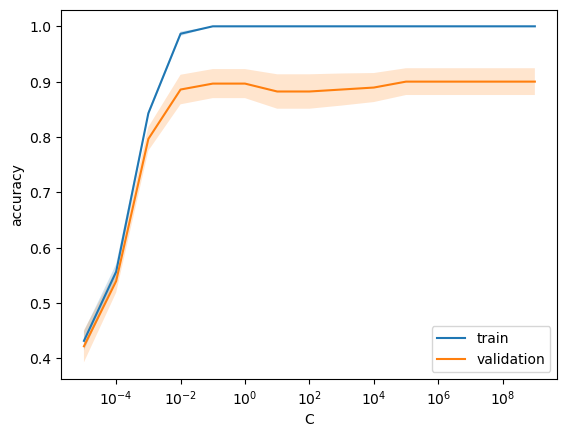

In [16]:
# Plot mean scores
plt.plot(df.C, df.mean_train_score, label="train")
plt.plot(df.C, df.mean_test_score, label="validation")

# Quantify variance with ±std curves
plt.fill_between(df.C, df.mean_train_score - df.std_train_score, df.mean_train_score + df.std_train_score, alpha=0.2)
plt.fill_between(df.C, df.mean_test_score - df.std_test_score, df.mean_test_score + df.std_test_score, alpha=0.2)
plt.xscale('log')
plt.ylabel("accuracy")
plt.xlabel("C")
plt.legend()

# Check for overfitting 
Do the training and validation curves indicate overfitting?

The training accuracy increases till 1 for $C \geq 0.01$.  
At this point the validation accuracy will remain constant, i.e. adding new data does not worsen the accuracy.  